# Problematic Internet Use :: Exploratory Data Analysis

- Test Set: 20 x 59 (columns)
- Train Set: 3960 x 82 (columns)
   - Target: `sii`
      - 0 for None
      - 1 for Mild
      - 2 for Moderate
      - and 3 for Severe


In [ ]:
# Quarto R setup chunck by Julia Silge (https://www.youtube.com/watch?v=5BojM5EciPs)

library(knitr)
knitr::opts_chunk$set(
    cache = TRUE,
    cache.lazy = FALSE,
    warning = FALSE,
    message =  FALSE,
    echo = TRUE,
    dpi = 180,
    fig.width = 8,
    fig.height = 5
)
library(tidyverse)
theme_set(theme_minimal())
update_geom_defaults("rect", list(fill = "midnightblue", alpha = 0.8))
update_geom_defaults("line", list(color = "midnightblue", alpha = 0.8))
update_geom_defaults("point", list(color = "midnightblue", alpha = 0.8))

In [6]:
test <- read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/test.csv")

Rows: 20 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): id, Basic_Demos-Enroll_Season, CGAS-Season, Physical-Season, Fitne...
dbl (48): Basic_Demos-Age, Basic_Demos-Sex, CGAS-CGAS_Score, Physical-BMI, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 20
Columns: 59
$ id                                       <chr> "00008ff9", "000fd460", "0010…
$ `Basic_Demos-Enroll_Season`              <chr> "Fall", "Summer", "Summer", "…
$ `Basic_Demos-Age`                        <dbl> 5, 9, 10, 9, 18, 13, 10, 10, …
$ `Basic_Demos-Sex`                        <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,…
$ `CGAS-Season`                            <chr> "Winter", NA, "Fall", "Fall",…
$ `CGAS-CGAS_Score`                        <dbl> 51, NA, 71, 71, NA, 50, NA, N…
$ `Physical-Season`                        <chr> "Fall", "Fall", "Fall", "Summ…
$ `Physical-BMI`                           <dbl> 16.87732, 14.03559, 16.64870,…
$ `Physical-Height`                        <dbl> 46.00, 48.00, 56.50, 56.00, N…
$ `Physical-Weight`                        <dbl> 50.8, 46.0, 75.6, 81.6, NA, 1…
$ `Physical-Waist_Circumference`           <dbl> NA, 22, NA, NA, NA, NA, NA, 2…
$ `Physical-Diastolic_BP`                  <dbl> NA, 75, 65, 60, NA, 60, 123, …
$ `Physical-HeartRa

In [5]:
train <- read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv")

Rows: 3960 Columns: 82
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): id, Basic_Demos-Enroll_Season, CGAS-Season, Physical-Season, Fitne...
dbl (70): Basic_Demos-Age, Basic_Demos-Sex, CGAS-CGAS_Score, Physical-BMI, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 3,960
Columns: 82
$ id                                       <chr> "00008ff9", "000fd460", "0010…
$ `Basic_Demos-Enroll_Season`              <chr> "Fall", "Summer", "Summer", "…
$ `Basic_Demos-Age`                        <dbl> 5, 9, 10, 9, 18, 13, 10, 10, …
$ `Basic_Demos-Sex`                        <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,…
$ `CGAS-Season`                            <chr> "Winter", NA, "Fall", "Fall",…
$ `CGAS-CGAS_Score`                        <dbl> 51, NA, 71, 71, NA, 50, NA, N…
$ `Physical-Season`                        <chr> "Fall", "Fall", "Fall", "Summ…
$ `Physical-BMI`                           <dbl> 16.87732, 14.03559, 16.64870,…
$ `Physical-Height`                        <dbl> 46.00, 48.00, 56.50, 56.00, N…
$ `Physical-Weight`                        <dbl> 50.8, 46.0, 75.6, 81.6, NA, 1…
$ `Physical-Waist_Circumference`           <dbl> NA, 22, NA, NA, NA, NA, NA, 2…
$ `Physical-Diastolic_BP`                  <dbl> NA, 75, 65, 60, NA, 60, 123, …
$ `Physical-Hear

In [16]:
train |>
  count(sii)

sii,n
<dbl>,<int>
0,1594
1,730
2,378
3,34
NA,1224


In [30]:
# What are different number of features in train and test set?
# there 23 different feature:
#   1. 22 Parent-Child Internet Addiction Test (PCIAT) features
#   2. the target, sii

# removing PCIAT features
train_less_pciat <- glimpse(train |>
  select(!starts_with('PCIAT')))

Rows: 3,960
Columns: 60
$ id                                       <chr> "00008ff9", "000fd460", "0010…
$ `Basic_Demos-Enroll_Season`              <chr> "Fall", "Summer", "Summer", "…
$ `Basic_Demos-Age`                        <dbl> 5, 9, 10, 9, 18, 13, 10, 10, …
$ `Basic_Demos-Sex`                        <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,…
$ `CGAS-Season`                            <chr> "Winter", NA, "Fall", "Fall",…
$ `CGAS-CGAS_Score`                        <dbl> 51, NA, 71, 71, NA, 50, NA, N…
$ `Physical-Season`                        <chr> "Fall", "Fall", "Fall", "Summ…
$ `Physical-BMI`                           <dbl> 16.87732, 14.03559, 16.64870,…
$ `Physical-Height`                        <dbl> 46.00, 48.00, 56.50, 56.00, N…
$ `Physical-Weight`                        <dbl> 50.8, 46.0, 75.6, 81.6, NA, 1…
$ `Physical-Waist_Circumference`           <dbl> NA, 22, NA, NA, NA, NA, NA, 2…
$ `Physical-Diastolic_BP`                  <dbl> NA, 75, 65, 60, NA, 60, 123, …
$ `Physical-Hear

In [56]:
# Vector of categorial features
categorial_features <- c("FGC-FGC_CU_Zone", "FGC-FGC_GSND_Zone", "FGC-FGC_GSD_Zone",
                         "FGC-FGC_PU_Zone", "FGC-FGC_SRL_Zone", "FGC-FGC_SRR_Zone",
                         "FGC-FGC_TL_Zone", "BIA-BIA_Activity_Level_num", "BIA-BIA_Frame_num",
                         "PreInt_EduHx-computerinternet_hoursday", "sii")

In [59]:
# Converting features into factor
train_factored <- train_less_pciat |>
  mutate_if(is.character, as.factor) |>
  mutate(across(categorial_features, as.factor))
glimpse(train_factored)

Rows: 3,960
Columns: 60
$ id                                       <fct> 00008ff9, 000fd460, 00105258,…
$ `Basic_Demos-Enroll_Season`              <fct> Fall, Summer, Summer, Winter,…
$ `Basic_Demos-Age`                        <dbl> 5, 9, 10, 9, 18, 13, 10, 10, …
$ `Basic_Demos-Sex`                        <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,…
$ `CGAS-Season`                            <fct> Winter, NA, Fall, Fall, Summe…
$ `CGAS-CGAS_Score`                        <dbl> 51, NA, 71, 71, NA, 50, NA, N…
$ `Physical-Season`                        <fct> Fall, Fall, Fall, Summer, NA,…
$ `Physical-BMI`                           <dbl> 16.87732, 14.03559, 16.64870,…
$ `Physical-Height`                        <dbl> 46.00, 48.00, 56.50, 56.00, N…
$ `Physical-Weight`                        <dbl> 50.8, 46.0, 75.6, 81.6, NA, 1…
$ `Physical-Waist_Circumference`           <dbl> NA, 22, NA, NA, NA, NA, NA, 2…
$ `Physical-Diastolic_BP`                  <dbl> NA, 75, 65, 60, NA, 60, 123, …
$ `Physical-Hear

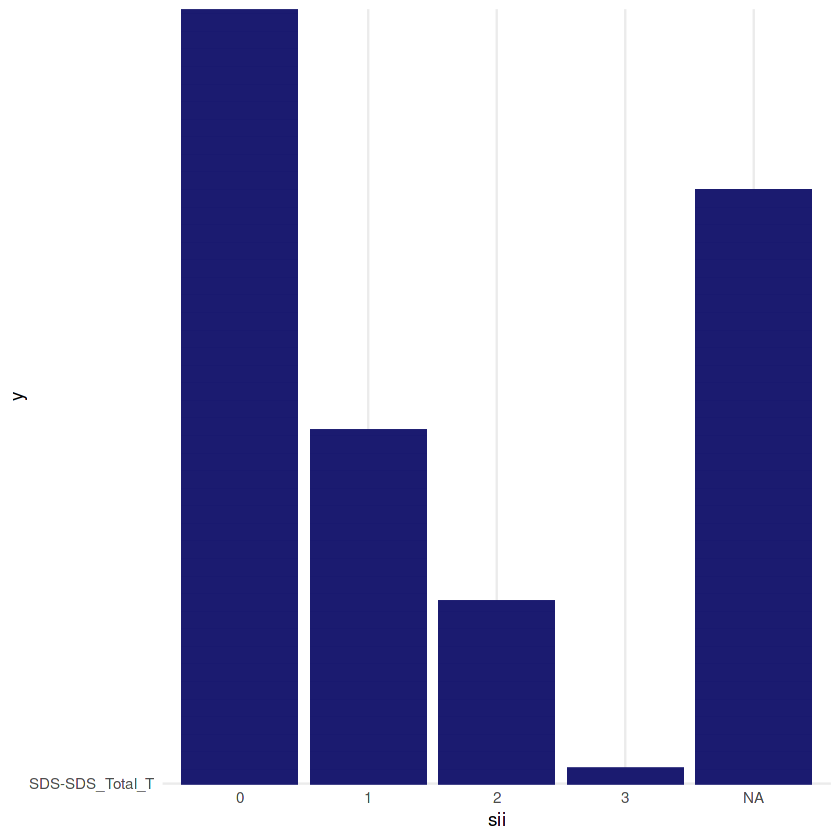

In [64]:
train_factored %>%
  ggplot(aes(sii, "SDS-SDS_Total_T")) +
  geom_col()

## Baseline

1. removing na columns inside train set
2. use ranger package for random forest

## Submission